Info for area type: carpet_area < built up area < super built up area

Plot area is the area for which the plot is given and not comparable with the above 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#Display all the coloumns of the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
dataset = pd.read_csv('dataset.csv')
dataset.shape

(13320, 9)

In [3]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
#We can remove availability since generally it should not affect the selling price.
#also finally when we will build the app, there we if we keep availability, we have to select from many options as
#availability can be any day in a year, so better drop this column
dataset = dataset.drop(['availability', 'society'], axis = 'columns')
dataset.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   location    13319 non-null  object 
 2   size        13304 non-null  object 
 3   total_sqft  13320 non-null  object 
 4   bath        13247 non-null  float64
 5   balcony     12711 non-null  float64
 6   price       13320 non-null  float64
dtypes: float64(3), object(4)
memory usage: 728.6+ KB


if we see the dataset info, there are 3 features with dtype as float64 and 6 features with dtype as object
The features with dtype as object are called categorical features, and other features are numerical features

In [6]:
#1st step is to replace the null values
#Find the no. of null values for each feature 
dataset.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [7]:
#1st find all the numerical features
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']
numerical_features

['bath', 'balcony', 'price']

In [8]:
dataset[numerical_features].isnull().sum()

bath        73
balcony    609
price        0
dtype: int64

In [9]:
#We will drop a column only if the number of null values are more than 50% of total no. of records(i.e 13320)
#So, we aren't dropping any numerical feature
#Replace the numerical features with mean
for feature in numerical_features:
    dataset[feature] = dataset[feature].fillna(dataset[feature].mean())
    
dataset[numerical_features].isnull().sum()

bath       0
balcony    0
price      0
dtype: int64

In [10]:
#Now find all the categorical features
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']
categorical_features

['area_type', 'location', 'size', 'total_sqft']

In [11]:
dataset[categorical_features].isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
dtype: int64

In [12]:
#Since none of the features have null value more than 50%, we will not drop any feature
#Replace all the missing values of categorical features with mode
for feature in categorical_features:
    dataset[feature] = dataset[feature].fillna(dataset[feature].mode()[0])
    
dataset[categorical_features].isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
dtype: int64

In [13]:
#Handle categorical features
#check whether any redundant categories are there or not(like 2 BHK and 2 bedroom are same and we can consider it 
#as one category)
dataset['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

For area_type, no categories are redundant , so its fine

In [14]:
dataset['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], shape=(1305,), dtype=object)

Some location might have abbreviations, not sure but overall looks like no redudant categories are there, so its fine

In [15]:
#Here we can see redundant categories like 2BHK and 2 bedroom, 4 BHK and 4 bedroom etc
#So, we can create a new column  which will not have these redundant categories for size
#size categories are 2 BHK, 2 bedroom, 3 BHK etc, so better to keep only 1st number i.e 2, 3 ,4 etc as no. of BHK
def consider_only_bhk_number(x):
    token = x.split(" ")
    try:
        return float(token[0])
    except:
        return None
    

In [16]:
df1 = dataset.copy()
#Here in consider_only_bhk_number(x), x will be a single value under this feature, here a single 'size'
df1['size'] = df1['size'].apply(consider_only_bhk_number)
df1.head(10)

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2.0,1056,2.0,1.000000,39.07
1,Plot Area,Chikka Tirupathi,4.0,2600,5.0,3.000000,120.00
2,Built-up Area,Uttarahalli,3.0,1440,2.0,3.000000,62.00
3,Super built-up Area,Lingadheeranahalli,3.0,1521,3.0,1.000000,95.00
4,Super built-up Area,Kothanur,2.0,1200,2.0,1.000000,51.00
5,Super built-up Area,Whitefield,2.0,1170,2.0,1.000000,38.00
6,Super built-up Area,Old Airport Road,4.0,2732,4.0,1.584376,204.00
7,Super built-up Area,Rajaji Nagar,4.0,3300,4.0,1.584376,600.00
8,Super built-up Area,Marathahalli,3.0,1310,3.0,1.000000,63.25
9,Plot Area,Gandhi Bazar,6.0,1020,6.0,1.584376,370.00


In [17]:
#Now we have total_sqft. It is a number but it is still a categorical data type. We need to convert it to float
#1st lets check for redundant values
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2117,), dtype=object)

In [18]:
#for range x1-x2, we will split on the basis of - and then take average of x1 and x2.
#if there are other values apart from range, we will simply return float of it , else none
def convert_range_to_float(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    

In [19]:
convert_range_to_float('3 - 4')

3.5

In [20]:
#Return None for this
convert_range_to_float('34.46Sq. Meter')

In [21]:
df1['total_sqft'] = df1['total_sqft'].apply(convert_range_to_float)
df1.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2.0,1200.0,2.0,1.0,51.00


In [22]:
df1.isnull().sum()

area_type      0
location       0
size           0
total_sqft    46
bath           0
balcony        0
price          0
dtype: int64

In [23]:
#remove null values. this null values are for total_sqft like 34.46Sq. Meter, for which convert_range_to_float func 
#returns Null. replace this null values with mean
df1['total_sqft'] = df1['total_sqft'].fillna(df1['total_sqft'].mean())

In [24]:
df1.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [25]:
#Introduce price per sq ft feature, which is a very important feature
#Price is in lakh, so multiply with 1 lakh and then divide price with total_sqft to get price per sqft
df1['price per sqft'] = (df1['price']*100000)/df1['total_sqft']
df1.head()

,area_type,location,size,total_sqft,bath,balcony,price,price per sqft
0,Super built-up Area,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Kothanur,2.0,1200.0,2.0,1.0,51.00,4250.000000


# Handle rare categorical features

In [26]:
df2 = df1.copy()
#Check how many unique area_types are there
len(df2['area_type'].unique())

4

For area_type, there are 4 unique categories. so if we do one hot encoding(to convert categorical feature into
numerical features) , then 4 new columns will be created and the original area_type column will be removed, so 3 extra new
columns will be created, which is feasible

In [27]:
#check how many unique location are there
len(df2['location'].unique())

1305

There are 1305 unique categories and one hot encoding will create new 1304 features, not at all feasible. This phenomenon of
having some many new features getting introduced due to one hot encoding is called dimensionality curse and we need to avoid
it. For that we need to perform dimensionality reduction. One technique is to label all rare categorical features with a single
label "Other"

In [28]:
#Remove leading and ending spaces from the location so that no ambiguity is created
df2['location'] = df2['location'].apply(lambda x: x.strip())

In [29]:
temp = df2['location'].value_counts()
temp

location
Whitefield            542
Sarjapur  Road        399
Electronic City       304
Kanakpura Road        273
Thanisandra           237
                     ... 
Hsr layout sector3      1
Thyagraj Nagar          1
Banagirinagar           1
Medaralli               1
Chikkajala              1
Name: count, Length: 1294, dtype: int64

We can see that there are many locations which appear only once, these are rare data. We can replace all these rare locations
with a single label named 'other'. We can keep a threshold like if no. of records for a location is less than 10(generally
consider 1% of total data), then it is rare and we will mark it as 'other'

In [30]:
len(temp[temp >= 30])


100

In [31]:
location_less_than_30 = temp[temp < 30]
location_less_than_30

location
Kammasandra           29
Dodda Nekkundi        29
Kudlu                 29
BTM 2nd Stage         29
Padmanabhanagar       28
                      ..
Hsr layout sector3     1
Thyagraj Nagar         1
Banagirinagar          1
Medaralli              1
Chikkajala             1
Name: count, Length: 1194, dtype: int64

In [32]:
locations_considered = temp[temp >= 30]
locations_considered

location
Whitefield            542
Sarjapur  Road        399
Electronic City       304
Kanakpura Road        273
Thanisandra           237
                     ... 
Ambedkar Nagar         31
Kumaraswami Layout     30
Ananth Nagar           30
Chikkalasandra         30
Doddathoguru           30
Name: count, Length: 100, dtype: int64

In [33]:
df2['location'] = df2['location'].apply(lambda x: 'other_loc' if x in location_less_than_30 else x )
df2['location'].value_counts()

location
other_loc             5379
Whitefield             542
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Ambedkar Nagar          31
Chikkalasandra          30
Doddathoguru            30
Kumaraswami Layout      30
Ananth Nagar            30
Name: count, Length: 101, dtype: int64

In [34]:
#Outlier Removal

#Start with sq ft. per bedroom. We can have a data like 6 BHK and total sq ft is only 1000,which is not possible and clearly
#an outlier. Outlier means an unusually less data or unusually high data, with reference to the threshold considered

#Considering the threshold for sq ft for 1 bedroom to be 300 sq.ft

df2[df2['total_sqft']/df2['size'] < 300].head()

,area_type,location,size,total_sqft,bath,balcony,price,price per sqft
9,Plot Area,other_loc,6.0,1020.0,6.0,1.584376,370.0,36274.509804
45,Plot Area,HSR Layout,8.0,600.0,9.0,1.584376,200.0,33333.333333
58,Plot Area,other_loc,6.0,1407.0,4.0,1.000000,150.0,10660.980810
68,Plot Area,other_loc,8.0,1350.0,7.0,0.000000,85.0,6296.296296
70,Plot Area,other_loc,3.0,500.0,3.0,2.000000,100.0,20000.000000


In the above records, we can see unusual data(6 bhk has 1020 total sq.ft, 8 bhk has 600 sq.ft etc.). 
These are wrong datas and therefore are outliers and can be directly removed

In [35]:
df2.shape

(13320, 8)

In [36]:
df3 = df2[~(df2['total_sqft']/df2['size'] < 300)]
df3.shape

(12572, 8)

In [37]:
df2 = df3
df2.shape

(12572, 8)

In [38]:
#Now consider price per sq. ft. Price per sq. ft can be too low or too high. 1st we need to check the description of 
#this feature price per sq ft
df2['price per sqft'].describe()

count     12572.000000
mean       6312.185150
std        4177.946702
min         267.829813
25%        4209.344773
50%        5294.736984
75%        6927.325006
max      176470.588235
Name: price per sqft, dtype: float64

As we can see , min value is 267 and max value is 176470. Min value is very absurd(very less). Max value might be possible
if the area is very high fi. But as we are building a generic model, we will consider values above a certain threshold
as outliers and remove them

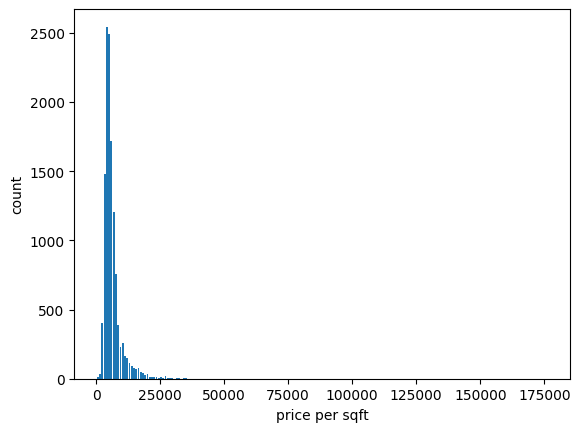

In [39]:
plt.hist(df2['price per sqft'], bins = 200, rwidth = 0.8)
plt.xlabel('price per sqft')
plt.ylabel('count')
plt.show()

From the histogram, we can see that the price per sqft column follows somewhat normal distribution. 
In case of any normal distribution, most of the values are centred around the mean i.e close to the mean.
From the describe(), we can see that mean is 6312 and this value lies b/w 50-75 percentile.
25 percentile is 4209 meaning 25% of total no. of records have price per sqft value less than 4209
50 % of total no. of records have price per sqft value less than 5294 and 75% of total no. of
records have price per sqft value less than 6927. So, we can say that from 25% to 75% i.e 50% of data are close to mean i.e
6312 and thus it roughly follows normal distribution

Since it follows normal distribution, we can apply standard deviation method to remove the outliers

In [40]:
#Generally we consider 3 standard deviation while removing outliers.
#It means mean is at centre, lower limit = mean - 3* 1 standard deviation, upper limit =  mean + 3* 1 standard deviation
#If the value lies b/w this lower limit and upper limit, it is not a outlier., else it is a outlier
#However here we are seeing that lower limit will be negative if we consider 3 standard deviation and price per sqft has min
#value as 267, so none of the values are negative, so all the values lower than mean will be considered as non-outlier, 
#which is incorrect. So, in this case we have to consider 1 standard deviation

#Whenever we are calculating mean and std, we should always do groupby first and then calculate as mean is for the all the 
#records under groupby category (here location)
def remove_pps_outliers(df):
    final_df = pd.DataFrame()
    for key, subdf in df.groupby('location'):
         upper_limit = subdf['price per sqft'].mean() + 1*subdf['price per sqft'].std()
         lower_limit = subdf['price per sqft'].mean() - 1*subdf['price per sqft'].std()
         subdf_without_outliers = subdf[(subdf['price per sqft'] >= lower_limit) & (subdf['price per sqft'] <= upper_limit)]
         final_df = pd.concat([final_df , subdf_without_outliers], ignore_index = True)
    return final_df

df3 = remove_pps_outliers(df2)
df3.shape

(10657, 8)

In [41]:
#No. of outlier records removed
df2.shape[0] - df3.shape[0]

1915

In [42]:
#Bathrooms: Its unusual that a 2 BHK house has 5 or 6 bathrooms, so those are outliers
#For bathroom , if no. of bathrooms greater than no. of bed rooms + 2, then it is an outlier and remove them
df3 = df3[df3['bath'] < df3['size'] + 2]
df3.shape

(10561, 8)

In [43]:
#Balcony : Its unusual that a 2 BHK house has 5 or 6 balcony, so those are outliers
#For balcony, if no. of balcony is greater than no of bed rooms + 2, then it is an outlier and remove them
df3 = df3[df3['balcony'] < df3['size'] + 2]
df3.shape

(10561, 8)

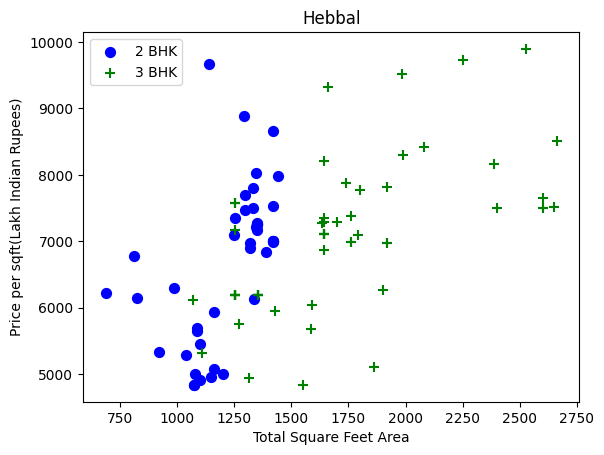

In [44]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df['location']==location) & (df['size']==2)]
    bhk3 = df[(df['location']==location) & (df['size']==3)]
    plt.scatter(bhk2['total_sqft'],bhk2['price per sqft'],color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'],bhk3['price per sqft'],marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price per sqft(Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df3,"Hebbal")

In [45]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_dict = {}
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_dict[bhk] = bhk_df['price per sqft'].mean()
             
        for bhk, bhk_df in location_df.groupby('size'):
            prev_bhk_mean = bhk_dict.get(bhk-1)
            if prev_bhk_mean:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price per sqft']< prev_bhk_mean].index.values)
    return df.drop(exclude_indices,axis='index')

df4 = remove_bhk_outliers(df3)
df4.shape

(5800, 8)

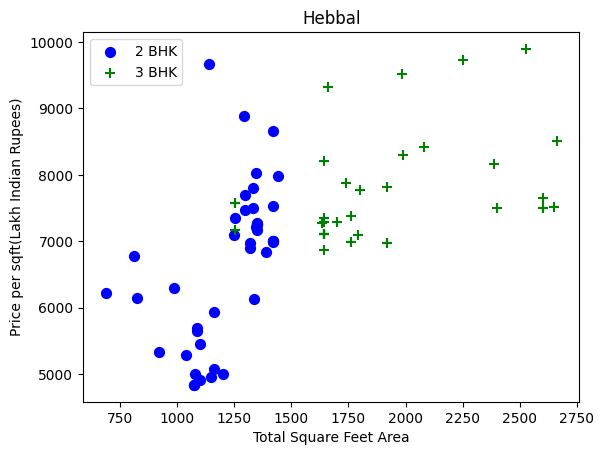

In [46]:
plot_scatter_chart(df4,"Hebbal")

In [47]:
#Now all outliers removed
#Since price per sqft column is only for removing outliers, so we can delete it
df4.drop(['price per sqft'], axis = 'columns', inplace = True)
df4.shape

(5800, 7)

In [48]:


#Convert categorical data into numerical data using one hot encoding

#For area type
dum = pd.get_dummies(df4['area_type'])
dum.head()

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,False,False,False,True
2,True,False,False,False
3,False,False,False,True
4,True,False,False,False
6,True,False,False,False


In [49]:
df5 = pd.concat([df4,dum], axis = 'columns')

In [50]:
#Drop area_type as dummy columns have already been created
df5.drop(['area_type'] , axis = 1, inplace = True)
df5.head()

,location,size,total_sqft,bath,balcony,price,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,5th Phase JP Nagar,2.0,1075.0,2.0,2.0,60.0,False,False,False,True
2,5th Phase JP Nagar,2.0,1256.0,2.0,1.0,62.8,True,False,False,False
3,5th Phase JP Nagar,2.0,1207.0,2.0,2.0,63.0,False,False,False,True
4,5th Phase JP Nagar,3.0,1725.0,2.0,2.0,100.0,True,False,False,False
6,5th Phase JP Nagar,3.0,1700.0,2.0,3.0,100.0,True,False,False,False


In [51]:
#Do one hot encoding for location
location_dummy = pd.get_dummies(df5['location'])
df6 = pd.concat([df5,location_dummy], axis = 'columns')
df6.drop(['location'], axis = 1, inplace = True)
df6.shape

(5800, 110)

In [52]:
#Now the model is ready to be trained
X = df6.drop('price' , axis = 'columns')
X.shape

(5800, 109)

In [53]:
y = df6['price']


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [57]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8561608749851549

In [58]:
#Use K-fold cross validation
#Shuffle split will randomize the dataset so that each of the fold will have equal distribution
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(lr_clf,X,y,cv=cv)

array([0.86961023, 0.87780421, 0.86913042, 0.8573367 , 0.86438712])

For linear regression, we see that for running cross val score 5 times, everytime we got a score of above 0.85, which is good
Lets try other models

In [60]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],  # 'mse' was deprecated
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


We see that linear regression performs best with best params as normalize = False

In [61]:
#Model prediction
X.head()

,size,total_sqft,bath,balcony,Built-up Area,Carpet Area,Plot Area,Super built-up Area,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Akshaya Nagar,Ambedkar Nagar,Ananth Nagar,Anekal,Attibele,Balagere,Banashankari,Bannerghatta Road,Basavangudi,Begur Road,Bellandur,Bhoganhalli,Bisuvanahalli,Bommanahalli,Bommasandra,Brookefield,Budigere,CV Raman Nagar,Chandapura,Channasandra,Chikkalasandra,Devanahalli,Doddathoguru,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,Gottigere,Green Glen Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Hormavu,Hosa Road,Hosakerehalli,Hosur Road,Hulimavu,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jigani,KR Puram,Kadugodi,Kaggadasapura,Kalena Agrahara,Kanakapura,Kanakpura Road,Kasavanhalli,Kengeri,Kengeri Satellite Town,Koramangala,Kothanur,Kudlu Gate,Kumaraswami Layout,Kundalahalli,Lakshminarayana Pura,Mahadevpura,Malleshwaram,Marathahalli,Mysore Road,Nagarbhavi,Old Airport Road,Old Madras Road,Panathur,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Ramagondanahalli,Ramamurthy Nagar,Sahakara Nagar,Sarjapur,Sarjapur Road,Subramanyapura,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Tumkur Road,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other_loc
0,2.0,1075.0,2.0,2.0,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2.0,1256.0,2.0,1.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2.0,1207.0,2.0,2.0,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,3.0,1725.0,2.0,2.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,3.0,1700.

In [62]:
X.columns

Index(['size', 'total_sqft', 'bath', 'balcony', 'Built-up  Area',
       'Carpet  Area', 'Plot  Area', 'Super built-up  Area',
       '5th Phase JP Nagar', '7th Phase JP Nagar',
       ...
       'Uttarahalli', 'Varthur', 'Vidyaranyapura', 'Vijayanagar',
       'Vittasandra', 'Whitefield', 'Yelahanka', 'Yelahanka New Town',
       'Yeshwanthpur', 'other_loc'],
      dtype='object', length=109)

In [63]:
X.columns = X.columns.str.strip()
X.columns

Index(['size', 'total_sqft', 'bath', 'balcony', 'Built-up  Area',
       'Carpet  Area', 'Plot  Area', 'Super built-up  Area',
       '5th Phase JP Nagar', '7th Phase JP Nagar',
       ...
       'Uttarahalli', 'Varthur', 'Vidyaranyapura', 'Vijayanagar',
       'Vittasandra', 'Whitefield', 'Yelahanka', 'Yelahanka New Town',
       'Yeshwanthpur', 'other_loc'],
      dtype='object', length=109)

In [64]:
np.where(X.columns == 'Plot  Area')[0][0]

np.int64(6)

In [65]:
def predict_val(area_type , location, size, total_sqft, bath, balcony):
    area_type_ind = np.where(X.columns == area_type)[0][0]
    
    if location not in locations_considered:
        location = 'other_loc'
    location_ind = np.where(X.columns == location)[0][0]
    
    data = np.zeros(len(X.columns))
    data[0] = size
    data[1] = total_sqft
    data[2] = bath
    data[3] = balcony
    data[area_type_ind] = 1
    data[location_ind] = 1
    
    return lr_clf.predict([data])[0]
    

In [66]:
predict_val('Built-up  Area','1st Phase JP Nagar',2,1000,2,2)

C:\Users\bharg\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(67.90790559863837)

In [67]:
predict_val('Built-up  Area','Indira Nagar',2,1000,2,2)

C:\Users\bharg\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(194.1354110201956)

In [68]:
predict_val('Built-up  Area','Indira Nagar',3,2000,2,2)

C:\Users\bharg\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(272.12610410972553)

In [69]:
predict_val('Super built-up  Area','Indira Nagar',3,2000,2,2)

C:\Users\bharg\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(274.46165343799464)

In [70]:
predict_val('Carpet  Area','Indira Nagar',3,2000,2,2)

C:\Users\bharg\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(279.66999294566915)

In [71]:
predict_val('Plot  Area','Indira Nagar',3,2000,2,2)

C:\Users\bharg\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(282.99066651237194)

In [74]:
#Export the tested model to a pickle file
#This pickle file contains only the weight and co-efficients of linear regression and not the actual whole data
#Thus its size is very less (3KB)
import pickle
with open('vikram.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [75]:
#Export column information into json file
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

Now this pickle file and json file will be used in Python flask server